#### Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import cv2
import re
from PIL import Image
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv1DTranspose
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import UpSampling1D
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1DTranspose
from tensorflow.keras.optimizers import Nadam 
from tensorflow.keras import layers

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.callbacks import ModelCheckpoint

from scipy.fft import fft, fftfreq
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Functions

In [2]:
decoder_CNN = tf.keras.models.load_model('/content/drive/MyDrive/Models/decoder_CNN.h5')
model_regresor = tf.keras.models.load_model('/content/drive/MyDrive/Models/model_LSTM_regresor.h5')

In [3]:
i = 0
n_samples_train = 1
recordings = 1
target = []
features = []

for j in range(recordings):

  recording_n = str(j+1)
  features = np.load("/content/drive/MyDrive/Regressor/Capacitive_Data_Train/Capacitive_Train_Process("+ recording_n +").npy")
  #n_samples_train = len(features)
  for i in range(n_samples_train):

      img_number = str(i)
      img_path = "/content/drive/MyDrive/Regressor/Image_FaceShieldPoints_Test/Img_Record(" + recording_n + ")/Img_Test" + img_number + ".png"
      print(img_path)
      a = cv2.resize(cv2.imread(img_path, cv2.IMREAD_GRAYSCALE), (256, 256), interpolation = cv2.INTER_CUBIC)
      a = a[..., np.newaxis]
      target.append(a)

  target = np.asarray(target)
  target = target/255.

  # If it is the first file.
  if (j == 0):
      total_features = features
      total_targets = target
  # If it is not the first file.
  else:
      total_features = np.concatenate((total_features, features), axis=0)
      total_targets = np.concatenate((total_targets, target), axis=0)

print("-------------------- Test Data - Characteristics --------------------")
print("Total size Feature Set:", total_features.shape)
print("Total size Target Set:", total_targets.shape)

print("-------------------- Regressor Prediction - Characteristics --------------------")
regressor_pred = model_regresor.predict(total_features)
print("Total size Regressor Vector Prediction:", regressor_pred.shape)

print("-------------------- Decoder Prediction - Characteristics --------------------")
decoder_pred = decoder_CNN.predict(regressor_pred)
print("Total size Decoder Image Prediction:", decoder_pred.shape)

/content/drive/MyDrive/Regressor/Image_FaceShieldPoints_Test/Img_Record(1)/Img_Test0.png
-------------------- Test Data - Characteristics --------------------
Total size Feature Set: (5652, 20, 8)
Total size Target Set: (1, 256, 256, 1)
-------------------- Regressor Prediction - Characteristics --------------------
Total size Regressor Vector Prediction: (5652, 30)
-------------------- Decoder Prediction - Characteristics --------------------
Total size Decoder Image Prediction: (5652, 256, 256, 1)


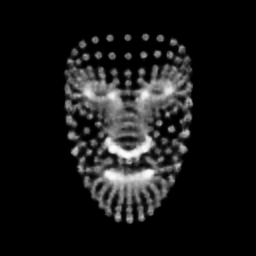

In [ ]:
img = decoder_pred[99]*255.
img = img.astype(int)
img = img[:, :, 0]
cv2_imshow(img)

In [ ]:
decoder_pred2 = decoder_pred[0:500]
for img in decoder_pred2:
  img = img*255.
  img = img.astype(int)
  img = img[:, :, 0]
  cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import cv2
import numpy as np
  
video_path = "/content/drive/MyDrive/Video_LSTM.avi"  
# choose codec according to format needed
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter(video_path, fourcc, 30, (256, 256))
i = 0
for img in decoder_pred:
  img = img*256.
  img = img.astype(int)
  img = img[:, :, 0]
  #if (i%10 == 0):
  img_name = "/content/drive/MyDrive/Video/Img" + str(i) + ".png"
  cv2.imwrite(img_name, img)
  img = cv2.imread(img_name)
  video.write(img)
  i = i + 1

cv2.destroyAllWindows()
video.release()


In [ ]:
i

3124

In [ ]:
import numpy as np
import cv2
import os
 
width = 1280
hieght = 720
channel = 3
 
fps = 300

fourcc = cv2.VideoWriter_fourcc(*'MP42') # FourCC is a 4-byte code used to specify the video codec.

video = cv2.VideoWriter('/content/drive/MyDrive/Video/Video.mp4', fourcc, float(fps), (width, hieght))
 
for img in decoder_pred:
  img = img*256.
  img = img.astype(int)
  img = img[:, :, 0]
  img = img.astype(np.uint8)
  #img = np.random.randint(0,255, (hieght, width, channel), dtype = np.uint8)
  video.write(img)
 
video.release()